# Problem Set IV - 40313 Introduction to Probability

## Question 1

Let $Z$ be a random variable with uniform distribution on $(0,1)$ and let $X_1,X_2$ be conditionally independent and identically distributed, given $Z$ with $P(X_i=1\mid Z)=1-P(X_i=0\mid Z)=Z$ ($i=1,2$).

**a.** Find $E(X_i)$ and $V(X_i)$ ($i=1,2$).

**Solution.**

By the law of total expectation, $E(X_i)=E\big(E(X_i\mid Z)\big)=E(Z)$.

Since $Z\sim \mathrm{Unif}(0,1)$, $E(Z)=\int_0^1 z\,dz=\tfrac12$, hence
$$
E(X_i)=\frac12.
$$

For the variance, we use the variance decomposition (law of total variance):
$$
V(X_i)=E\!\big[V(X_i\mid Z)\big]+V\!\big(E(X_i\mid Z)\big)
=E\!\big[Z(1-Z)\big]+V(Z).
$$

Now $E[Z(1-Z)]=E(Z)-E(Z^2)=\tfrac12-\tfrac13=\tfrac16$, and
$V(Z)=E(Z^2)-E(Z)^2=\tfrac13-\tfrac14=\tfrac1{12}$.

Therefore
$$
V(X_i)=\frac16+\frac1{12}=\frac14.
$$

**b.** Find $\mathrm{Cov}(X_1 , X_2)$.

**Solution.**

Conditional on $Z$, $X_1$ and $X_2$ are independent, so
$$
E(X_1X_2)=E\!\big(E(X_1X_2\mid Z)\big)=E\!\big(E(X_1\mid Z)E(X_2\mid Z)\big)=E(Z^2)=\frac13.
$$

Thus
$$
\mathrm{Cov}(X_1,X_2)=E(X_1X_2)-E(X_1)E(X_2)=\frac13-\frac12\cdot\frac12=\frac13-\frac14=\frac1{12}.
$$

**c.** Are $X_1,X_2$ stochastically independent?

**Solution.**

**No.** Independence would require $P(X_1=1,X_2=1)=P(X_1=1)P(X_2=1)$.

But
$$
P(X_1=1,X_2=1)=E(Z^2)=\frac13\neq \left(E(Z)\right)^2=\left(\frac12\right)^2=\frac14.
$$
Hence they are not independent (they are exchangeable with positive covariance).

**d.** Find $P(Z\leq 1/2\mid X_1=1)$.

**Solution.**

By Bayes’ rule with a continuous prior (the *Bayesian scheme*), the posterior of $Z$ after one success is
$$
Z\mid X_1=1\sim \mathrm{Beta}(1+1,1+0)=\mathrm{Beta}(2,1),
$$
with density $f(z\mid X_1=1)=2z\,\mathbf 1_{(0,1)}(z)$.

Therefore
$$
P\!\big(Z\le \tfrac12 \mid X_1=1\big)=\int_0^{1/2} 2z\,dz=\left.z^2\right|_{0}^{1/2}=\frac14.
$$

## Question 2

**a.** Generate in Python 1000 observations $(x_i,y_i)$ from a bivariate normal distribution with mean vector $(0,0)$ and variance-covariance matrix
            $$
            \left[
            \begin{array}{cc}
            1&0.2\\
            0.2&1
            \end{array}
            \right].
            $$

In [1]:
import numpy as np

# Reproducibility
rng = np.random.default_rng(40313)

# Mean vector and covariance matrix
mu = np.array([0.0, 0.0])
Sigma = np.array([[1.0, 0.2],
                  [0.2, 1.0]])

# Draw 1000 observations
data = rng.multivariate_normal(mean=mu, cov=Sigma, size=1000)
x = data[:, 0]
y = data[:, 1]

**b.** Draw an histogram of $x_1,\dots,x_{1000}$.

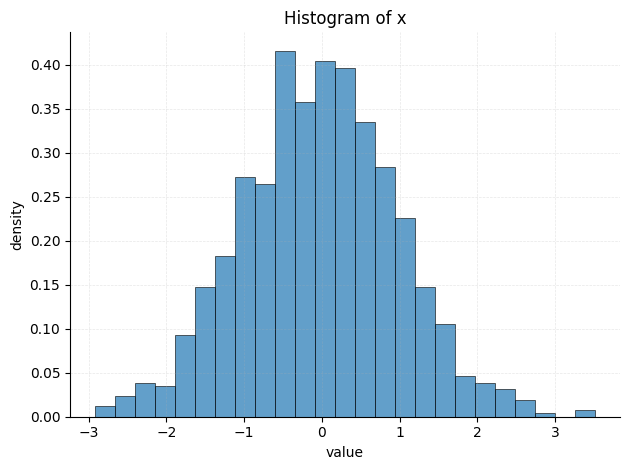

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(
    x,
    bins="fd",
    density=True,
    alpha=0.7,
    edgecolor="black",
    linewidth=0.6,
)

ax.set_title("Histogram of x")
ax.set_xlabel("value")
ax.set_ylabel("density")
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
fig.tight_layout()
plt.show()

**c.** Draw an histogram of those $y_i$ such that $x_i\leq 0$.

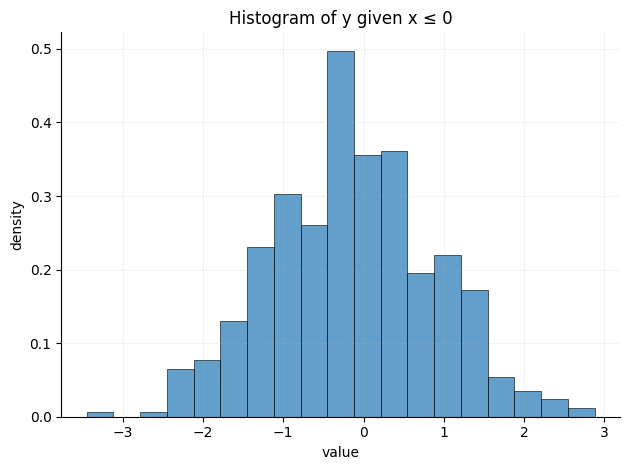

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask = x <= 0
y_subset = y[mask]

fig, ax = plt.subplots()
ax.hist(
    y_subset,
    bins="fd",
    density=True,
    alpha=0.7,
    edgecolor="black",
    linewidth=0.6,
)

ax.set_title("Histogram of y given x ≤ 0")
ax.set_xlabel("value")
ax.set_ylabel("density")
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
fig.tight_layout()
plt.show()